## Analysing Correlations Between Automobile Characteristics And Their Price

In this project, we are going to analyze a dataset consisting of used automobiles and their various characteristics.

The goal of this project is to analyze and understand the factors that determine the price of an used automobile.

Based on preconceived notions, we should see a direct relation between the price and the type of fuel it uses, the type of drive-train the vehicle has and the horsepower of the vehicle.

## Dataset Used:

The dataset used here is :

[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)

Credits : Jeffrey C. Schlimmer

Note : Since this dataset is from 1987, the price values will be different compared to modern times. 

Here are the column descriptions for the dataset : 

|    Column Name    	|                                                                                                              Description                                                                                                              	|                                                                                           Range of Values                                                                                          	|
|:-----------------:	|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:	|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:	|
|     symboling     	|                            Corresponds to the degree to which the automobile is  more risky than its price indicates. A value of +3 indicates that the auto is risky,  -3 that it is probably pretty safe.                            	|                                                                                       -3, -2, -1, 0, 1, 2, 3                                                                                       	|
| normalized-losses 	| Relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, sports/speciality, etc.),  and represents the average loss per car per year. 	|                                                                                      continuous from 65 to 256                                                                                     	|
|        make       	|                                                                                                            Self-Explanatory                                                                                                           	| alfa-romero, audi, bmw, chevrolet, dodge, honda,  isuzu, jaguar, mazda, mercedes-benz, mercury,  mitsubishi, nissan, peugot, plymouth, porsche,  renault, saab, subaru, toyota, volkswagen, volvo, 	|
|     fuel-type     	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                             diesel, gas                                                                                            	|
|     aspiration    	|                                                                                                   Type of Aspiration used in Engine                                                                                                   	|                                                                                             std, turbo.                                                                                            	|
|    num-of-doors   	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                             four, two.                                                                                             	|
|     body-style    	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                wagon, sedan, hatchback, convertible.                                                                               	|
|    drive-wheels   	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                           4wd, fwd, rwd.                                                                                           	|
|  engine-location  	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                            front, rear.                                                                                            	|
|     wheel-base    	|                                                                                       Distance between the centers of the front and rear wheels                                                                                       	|                                                                                     continuous from 86.6 120.9.                                                                                    	|
|       length      	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                   continuous from 141.1 to 208.1.                                                                                  	|
|       width       	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 60.3 to 72.3.                                                                                   	|
|       height      	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 47.8 to 59.8.                                                                                   	|
|    curb-weight    	|            Total weight of the automobile including all the necessary operating consumables such as motor oil, transmission oil , coolant, air conditioning refrigerant, while not loaded with either passengers or cargo.            	|                                                                                    continuous from 1488 to 4066.                                                                                   	|
|    engine-type    	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                               dohc, dohcv, l, ohc, ohcf, ohcv, rotor.                                                                              	|
|  num-of-cylinders 	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                             eight, five, four, six, three, twelve, two.                                                                            	|
|    engine-size    	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                     continuous from 61 to 326.                                                                                     	|
|    fuel-system    	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                            1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.                                                                           	|
|        bore       	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 2.54 to 3.94.                                                                                   	|
|       stroke      	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 2.07 to 4.17.                                                                                   	|
| compression-ratio 	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                       continuous from 7 to 23                                                                                      	|
|     horsepower    	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                      continuous from 48 to 288                                                                                     	|
|      peak-rpm     	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 4150 to 6600                                                                                    	|
|      city-mpg     	|                                                                                                         City miles per gallon                                                                                                         	|                                                                                      continuous from 13 to 49                                                                                      	|
|    highway-mpg    	|                                                                                                        Highway miles per gallon                                                                                                       	|                                                                                      continuous from 16 to 54                                                                                      	|
|       price       	|                                                                                                            Self-Explanatory                                                                                                           	|                                                                                    continuous from 5118 to 45400                                                                                   	|


Let us now import the dataset.

In [1]:
import pandas as pd
import numpy as np
dlink = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" #Link to dataset
#Since our dataset has no header , we set header option to none
autset = pd.read_csv(dlink, header = None)
#Setting headers for the dataset
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
autset.columns = headers
#printing rows to check the dataset
print("Total number of rows in dataset are",len(autset))
autset.head()



Total number of rows in dataset are 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Checking the data for missing values

In [2]:
# Describes the dataset for all numeric columns
autset.describe(include ='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


We see that there are a number of fields with '?' , indicating missing data. 

We will now check for null values in the dataset

In [3]:
#Print true or false if there are null values in any columns
autset.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

We see that even though there are values that are missing, when we check for null values, all the columns show up as false.

This is because the null values are not assigned as NaN . Hence we will now assign these values as such.

In [4]:
#Set all rows having '?' as values to NaN
autset.replace("?", np.nan, inplace = True)
#inplace is used to overwrite the dataset
autset.isnull().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

We will now check the total amount of missing values for each column

In [5]:
autset.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We see that there are:
1. 41 rows with missing values for normalized-losses column.
2. 2 rows each for num-of-doors,horsepower and peak-rpm columns.
3. 4 rows each for bore, stroke and price columns


# Cleaning the Columns

## Cleaning Price Column by Dropping Rows

In [6]:
autset["price"].describe()

count       201
unique      186
top       13499
freq          2
Name: price, dtype: object

Price is supposed to be an numeric type, not object.

As such, we change this type to float

In [7]:
autset["price"]=pd.to_numeric(autset["price"])
autset["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

We will now print the NaN values in price column

In [8]:
autset[autset["price"].isnull() == True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


We see that there are 4 rows where price is NaN.

Since our study is based on the price of automobiles , we will drop these rows.

In [9]:
#Setting the dataset to a filtered version of itself
print("Number of rows are",len(autset))
#dropping rows having null values under column 'price'
autset= autset.dropna(subset=['price'])
print("New number of rows are",len(autset))
autset.isnull().any()

Number of rows are 205
New number of rows are 201


symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                False
dtype: bool

We see that the 4 rows having the missing price values have now been removed and the price column has no more null values.

## Cleaning Columns by replacing with average value 

For the normalized-losses,horsepower,peak-rpm,bore and stroke columns, we can replace these values with the mean values of the column

Removing all these rows will lead to a significant reduction in dataset size. As such, this is not preferrable.

In [10]:
autset["normalized-losses"].describe()

count     164
unique     51
top       161
freq       11
Name: normalized-losses, dtype: object

We see that the datatype here is that of object and as such we will not be able to calculate the mean directly. 

In order to rectify this, we could convert the column to that of type float and then calculate the mean for each make

In [11]:
autset["normalized-losses"]=pd.to_numeric(autset["normalized-losses"])
autset["normalized-losses"].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

Now that we have converted the column, we can calculate the mean for the normalized losses column

In [12]:
nlmean = autset["normalized-losses"].mean()
nlmean

122.0

We now assign this value to all the NaN values in the normalized losses column

In [13]:
# Replace the na values in "normalized-losses" with the mean value
autset = autset.fillna(value={"normalized-losses":nlmean})
#confirm that normalized losses indeed has no NaN values.
autset[autset["normalized-losses"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


We can do the same for the other columns as well

In [14]:
autset["horsepower"]=pd.to_numeric(autset["horsepower"])
hpmean = autset["horsepower"].mean()
# Replace the na values in "horsepower" with the mean value
autset = autset.fillna(value={"horsepower":hpmean})
#confirm that horsepower column indeed has no NaN values.
autset[autset["horsepower"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [15]:
autset["stroke"]=pd.to_numeric(autset["stroke"])
strokemean = autset["stroke"].mean()
# Replace the na values in "stroke" with the mean value
autset = autset.fillna(value={"stroke":strokemean})
#confirm that stroke column indeed has no NaN values.
autset[autset["stroke"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [16]:
autset["bore"]=pd.to_numeric(autset["bore"])
bmean = autset["bore"].mean()
# Replace the na values in "bore" with the mean value
autset = autset.fillna(value={"bore":bmean})
#confirm that bore column indeed has no NaN values.
autset[autset["bore"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [17]:
autset["peak-rpm"]=pd.to_numeric(autset["peak-rpm"])
pmean = autset["peak-rpm"].mean()
# Replace the na values in "peak-rpm" with the mean value
autset = autset.fillna(value={"peak-rpm":pmean})
#confirm that normalized losses indeed has no NaN values.
autset[autset["peak-rpm"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


The num-of-doors is now the only column left with NaN values

## Cleaning column by assigning most frequent value

We now check the num-of-doors column for NaN values there. 

In [18]:
autset.isnull().any()
autset[autset["num-of-doors"].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


We see that the 2 rows having no value for number of doors are automobiles with body style , sedan. 
Generally speaking, sedans usually have 4 doors.We could simply replace these values with 4.

However, rather than going on a generalisation, we can check the frequency of number of doors for automobiles with body style as sedan.

In [19]:
#Checking number of doors for vehicles with different body styles
autset.groupby(["body-style","num-of-doors"]).size()

body-style   num-of-doors
convertible  two              6
hardtop      two              8
hatchback    four            10
             two             58
sedan        four            78
             two             14
wagon        four            25
dtype: int64

As it can be seen most sedans have 4 doors, as such, we can assign 4 to the rows with the missing values as well.

In [20]:
autset["num-of-doors"].replace(np.nan, "four", inplace=True)

In [21]:
autset.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

We now have no columns with missing values

## Analysing Patterns using Visualization

## Continuous Variables:

Installing seaborn package as given below:

In [22]:
%%capture
! pip install seaborn

We then import the visualization models matplot and seaborn to plot the required graphs

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

We use corr() to check the correlation between the various numeric fields in the dataset

In [24]:
autset.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267


Upon analysis, we see high correlations between price and:
 1. Engine Size
 2. Highway/City MPG
 3. Curb Weight
 4. Horsepower

We will now determine scatter plots between these fields.


## Scatter Plot between Engine Size and Price

(0, 56020.45855614974)

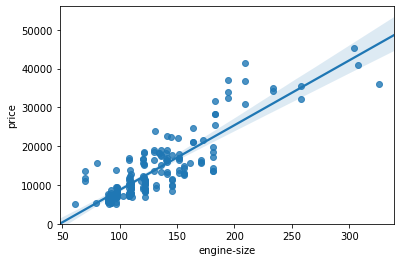

In [25]:
sns.regplot(x="engine-size", y="price", data=autset)
plt.ylim(0,)

From the graph, we see that engine size has a strong linear dependence on price.

It is safe to say that the engine size is a good predictor of price.

## Scatter Plot between MPG and Price

(0, 48284.10266123645)

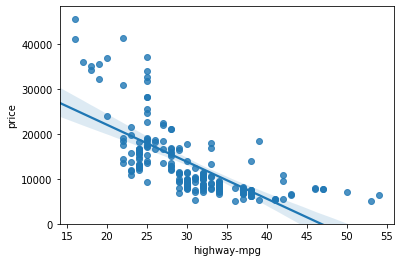

In [26]:
sns.regplot(x = "highway-mpg" , y = 'price' , data = autset)
plt.ylim(0,)

We see that as the highway mpg increases, the price decreases. 

Highway mpg could be another potential indicator for price as well.

Checking city mpg scatter plot as well:

(0, 48368.87320424888)

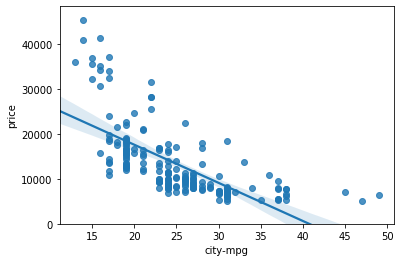

In [27]:
sns.regplot(x = "city-mpg" , y = 'price' , data = autset)
plt.ylim(0,)

Similar negative relationship is seen , although the graph is not as steep as seen in that of highway mpg. 

## Scatter Plot between Curb Weight and Price

(0, 47867.198069211816)

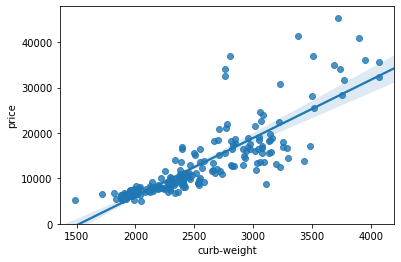

In [28]:
sns.regplot(x='curb-weight',y='price',data=autset)
plt.ylim(0,)

Similar to engine size , we see a strong correlation between curb weight and price. 

However an important thing to note here would be that engine size could be affecting this relation.

This is because a bigger engine will inadvertently have more weight. 

The same thing could be explained for the length and width fields as well. To occupy a larger engine, we would require a bigger chassis or vehicle size.

This information is further backed from the correlations between engine size,curb weight,length and width all having high positive relations with each other (Values being greater than 0.7).

## Scatter Plot between Horsepower and Price

(0, 49198.36198289567)

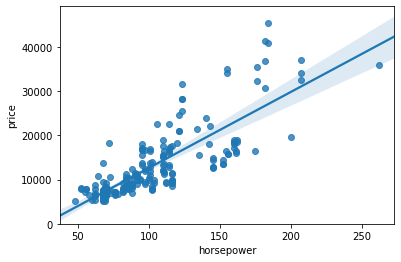

In [29]:
sns.regplot(x='horsepower', y='price', data=autset)
plt.ylim(0,)

A strong positive correlation is seen between horsepower and price with a very steep graph.

This indicates that price is directly dependent on horsepower and that dependency is extremely significant.

# Categorical Values

Categorical values that could affect the price are:

 1. Type of fuel used
 2. Aspiration 
 3. Number of doors
 4. Drive Wheels
 5. Number of Cylinders
 6. Body Style
 7. Engine Location

## Box Plot between Type of Fuel Used and Price

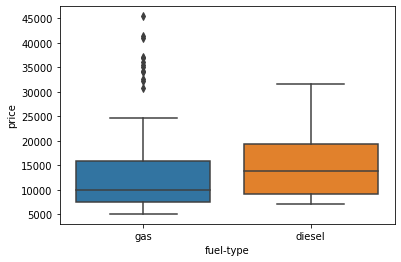

In [30]:
sns.boxplot(x="fuel-type", y="price", data=autset)

We see that there is not much significant difference in price between vehicles using gas and diesel, with vehicles using gas having a slight increase in price

## Box Plot between Aspiration and Price

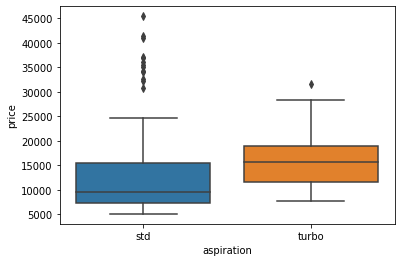

In [31]:
sns.boxplot(x="aspiration", y="price", data=autset)

Here we see a slightly higher increase in price between vehicles using turbo and std type of aspiration.

However, the difference still isn't very significant with there being many outliers for the std box.

## Box Plot between Number of Doors and Price


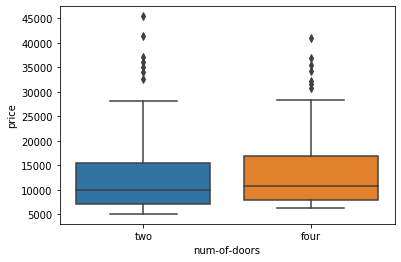

In [32]:
sns.boxplot(x="num-of-doors", y="price", data=autset)

Barely any difference in price between vehicles having two and four doors.

Safe to say that number of doors does not affect the price at all.

## Box Plot between Drive Wheels  and Price

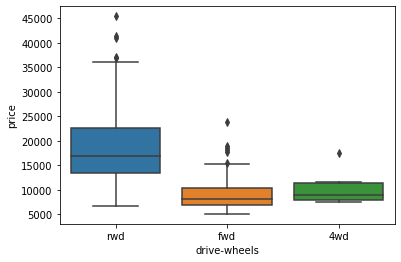

In [33]:
sns.boxplot(x="drive-wheels", y="price", data=autset)

In the case of drivetrains (drive-wheels) , we see a big difference in price in vehicles having rear wheel drive.

There is also a slight increase in price in vehicles having 4wd compared to fwd.

Drive wheels seems to be a significant indicator of price

## Box Plot between Number of Cylinders and Price

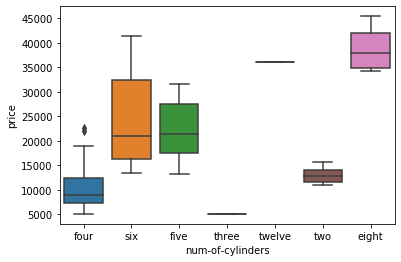

In [34]:
sns.boxplot(x="num-of-cylinders", y="price", data=autset)

There seems to be no relation of price to number of cylinders as number of cylinders does not correspond directly or indirectly with price.

## Box Plot between Body Style and Price

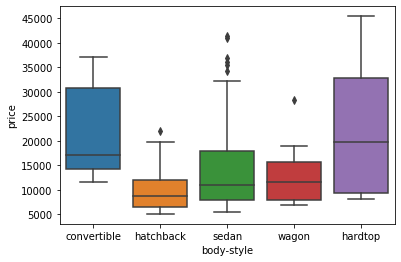

In [35]:
sns.boxplot(x="body-style", y="price", data=autset)

Here we see that having certain body types does seem to have higher price overall. 

However we check this further to see if any other columns are affecting this price.

In [36]:
#Displaying all entries with body style as convertible or hardtop
autset.loc[(autset["body-style"]=='convertible') | ( autset["body-style"]== 'hardtop') ]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
98,2,168.0,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,8249.0
126,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0
127,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
167,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,8449.0


We see that for most of these rows, the drive-wheels is rwd, which has already been established having a significant relation to price.

Hence we can conclude that body type alone doesn't affect the price significantly.

## Box Plot between Engine Location and Price

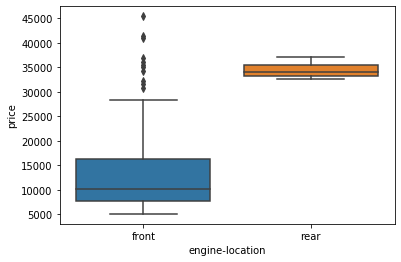

In [37]:
sns.boxplot(x="engine-location", y="price", data=autset)

A massive difference in prices is observed between vehicles having engines in their rear and their front.

There seems to be a good dependence of price on engine location.

(0, 48283.12159906009)

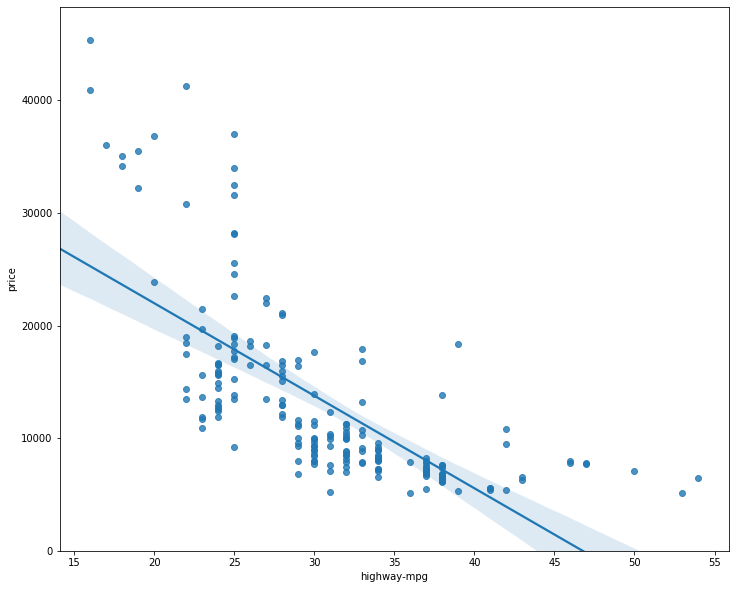

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=autset)
plt.ylim(0,)

In [39]:
autset.to_csv("new.csv")

# Conclusion

We started this project with the aim to determine which factors affect the price of a vehicle. 

From our analysis, we can conclude the following:

Major Effects on Price : 
    
    Continuous Variables:
    1. Engine Size
    2. Highway and City MPG
    3. Curb Weight
    4. Length
    5. Width
    6. Horsepower
    
    Categorical Variables:
    1. Drive Wheel
    2. Engine Location
    
Minor Effects on Price:

    Continuous Variables:
    1. Wheel Base
    2. Bore
    3. Height
    
    Categorical Variables:
    1. Fuel Type
    2. Aspiration
    3. Body Style

None or Insignificant Effects on Price:

    Continuous Variables:
    1. Stroke
    2. Compression Ratio
    3. Peak Rpm
    4. Symboling
    5. Normalized Losses
    
    
    Categorical Variables:
    1. Number of Doors
    2. Number of Cylinders
    
    